In [12]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from spicy import stats

In [13]:
amazon_df = pd.read_csv(r"C:\Users\yagoc\OneDrive\Escritorio\Pite\datasets\amz_uk_price_prediction_dataset.csv")

In [14]:
amazon_df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [15]:
amazon_df.describe().round(2)

,uid,stars,reviews,price,boughtInLastMonth
count,2443651.00,2443651.00,2443651.00,2443651.00,2443651.00
mean,1370545.35,2.15,480.63,89.24,25.90
std,816056.17,2.19,5944.12,345.61,240.48
min,1.00,0.00,0.00,0.00,0.00
25%,658921.50,0.00,0.00,9.99,0.00
50%,1349029.00,0.00,0.00,19.09,0.00
75%,2060685.50,4.40,59.00,45.99,0.00
max,2828593.00,5.00,1356658.00,100000.00,50000.00


In [16]:
cat = amazon_df.select_dtypes(exclude="number")
num = amazon_df.select_dtypes(include="number")

In [17]:
frequency_table_cat = cat["category"].value_counts()
frequency_table_cat
## The most buyed category is Sports and Outdoors
## the top 5 most buyed are:
# sp and out, beauty, handmade clothing shoes and accessories, bath & body, birthday gifts


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

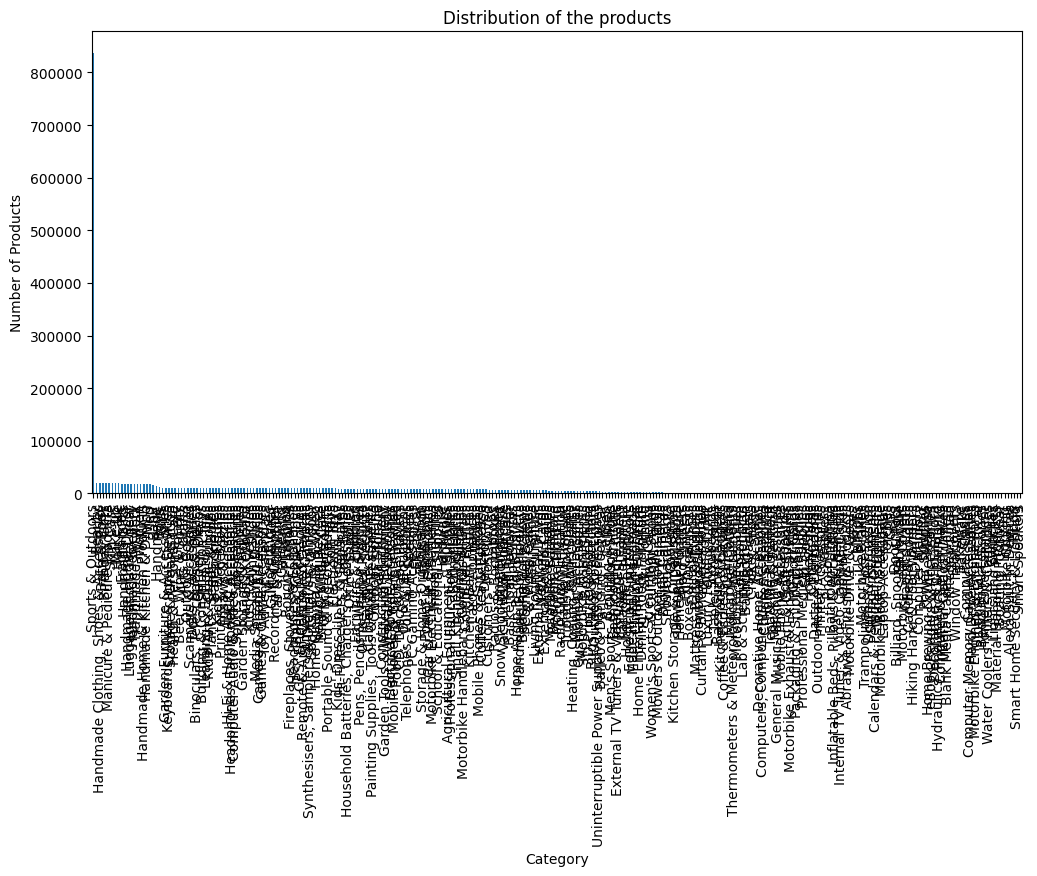

In [18]:
plt.figure(figsize=(12,6))
frequency_table_cat.plot(kind="bar")
plt.title("Distribution of the products")
plt.xlabel("Category")
plt.ylabel("Number of Products")



plt.show()


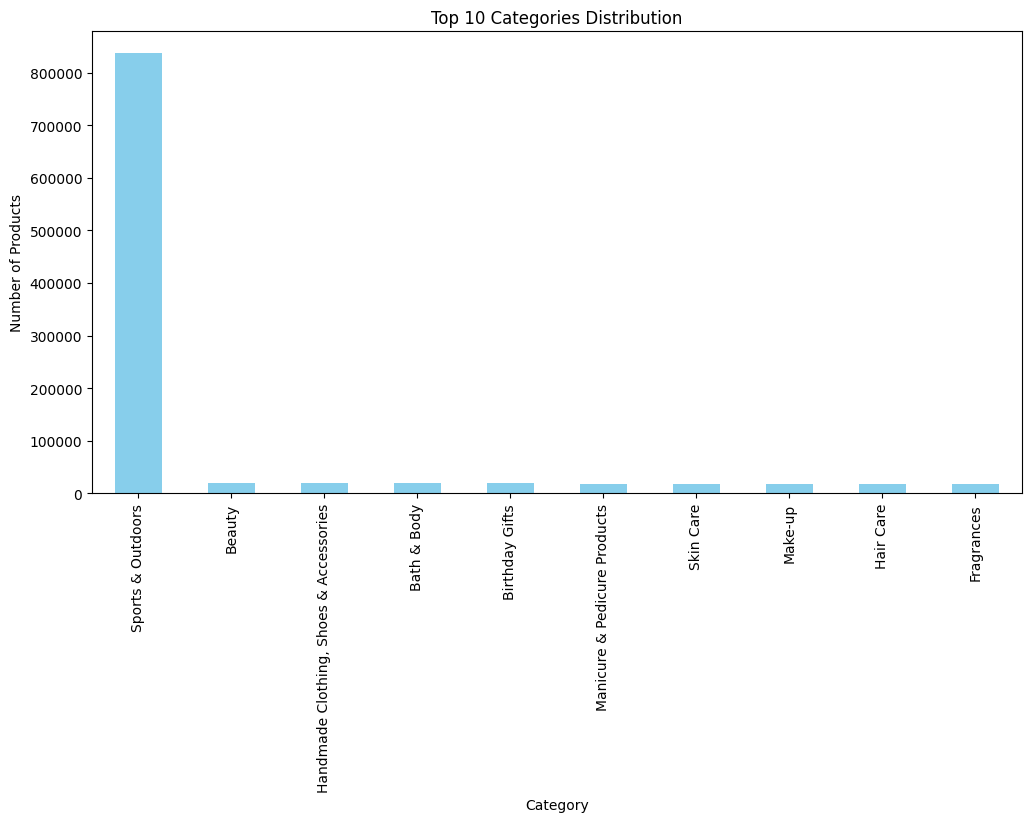

In [19]:
import math

first10 = frequency_table_cat.iloc[0:10]
cat20 = frequency_table_cat.iloc[10:20]
cat30 = frequency_table_cat.iloc[20:30]

plt.figure(figsize=(12,6))
first10.plot(kind="bar", color="skyblue")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.title("Top 10 Categories Distribution")
plt.show()


Text(0.5, 1.0, 'Distribution of the products')

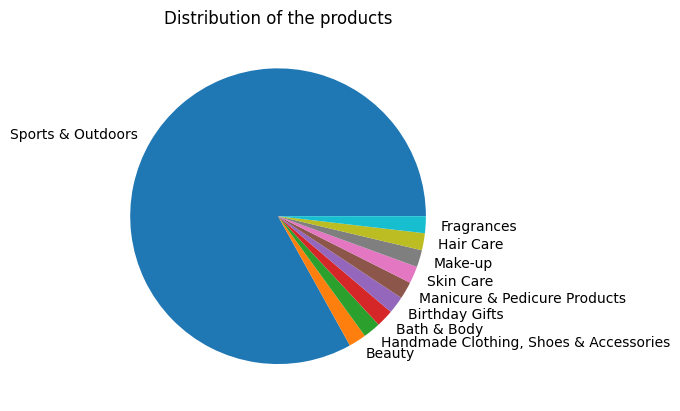

In [20]:
plt.pie(first10.values, labels= first10.index)

plt.title("Distribution of the products")

In [21]:
num["price"].describe().round(2)


count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [22]:
num["price"].mode()




0    9.99
Name: price, dtype: float64

### this is telling us that the most common price listed is 9,99$ (although can sound weird knowing that only 25€ falls under 9.99)
### the average price is 89.24$, this may be due a high amount of products that are above 80$ ( sort of what we can see at the 75% data description)

### from such a big standard deviation, we can conclude that the prices deviate a lot from the average price (89,24$), although the mode and the average can lead to make some wrong conclusions

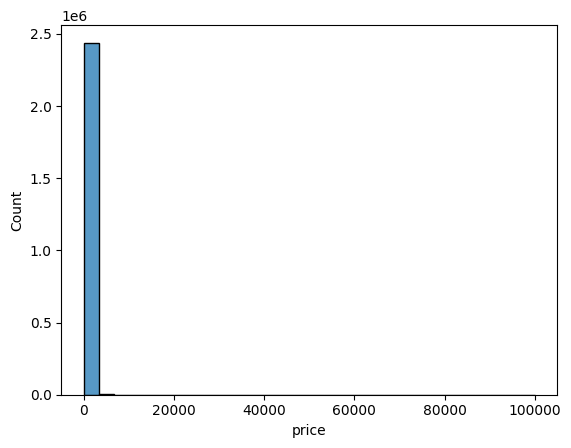

In [23]:
sns.histplot(x=amazon_df.price, bins=30);




### i've tried to solve the problem by adding the bins variable in the histogram but the data is so condensed in a range that makes it impossible to have a good overview of it

<Axes: xlabel='price'>

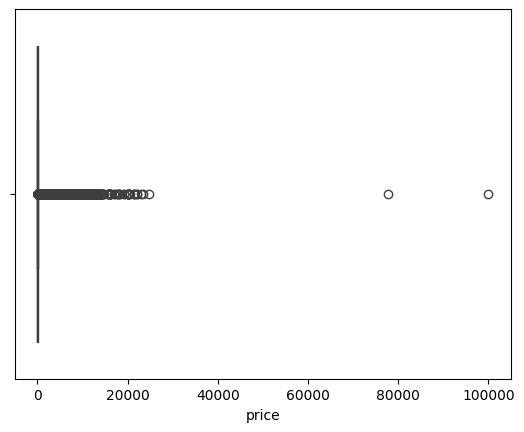

In [24]:
sns.boxplot(x="price", data=amazon_df)



### as you see, there's a few prices that are so far away from the average, that makes data to be spread

In [25]:
print(f"the mode for the ratings is {num["stars"].mode()}")
print(f"the median for ratings is {num["stars"].median()}")

print(f"the average rating is {num["stars"].mean().round(2)}")



the mode for the ratings is 0    0.0
Name: stars, dtype: float64
the median for ratings is 0.0
the average rating is 2.15


### aparently there's a lot of people that rates with 0 stars some products.
### this causes a lot of spreading for the rates data column

In [26]:
num["stars"].describe().round(2)



count    2443651.00
mean           2.15
std            2.19
min            0.00
25%            0.00
50%            0.00
75%            4.40
max            5.00
Name: stars, dtype: float64

### seems to not be a clear tendency, the ratings are pretty much spead around

In [27]:
ratings = amazon_df["stars"]

In [28]:
skeweness = stats.skew(num["stars"])
kurtosis = stats.kurtosis(num["stars"])

print(f"skeweness: {skeweness:.2f}")
print(f"kurtosis: {kurtosis:.2f}")

skeweness: 0.08
kurtosis: -1.93


### aparently all ratings are super spread, there's almost a symetric line between good and bad reviews.
### kurtosis so low  means that out ratings column has a super flat distribution

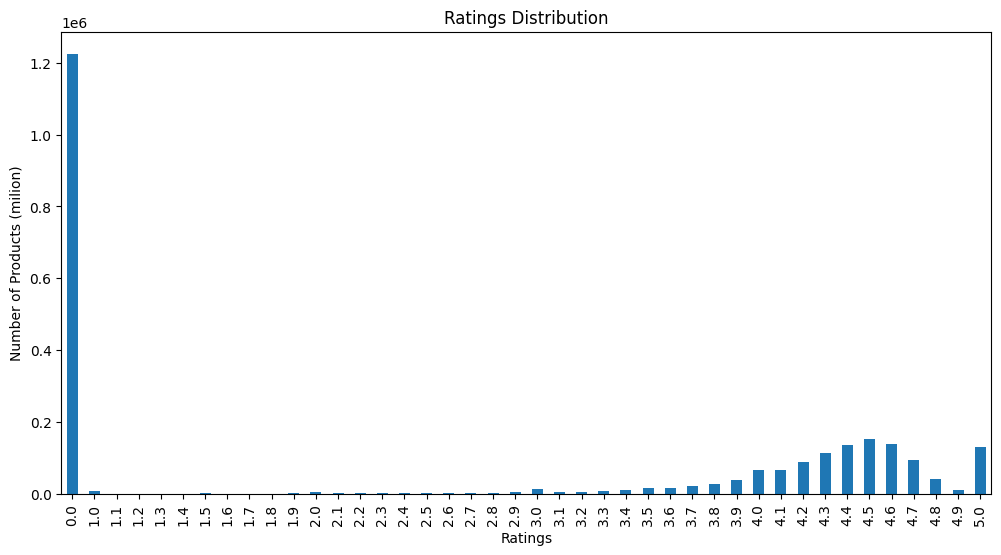

In [29]:
rating_feq = ratings.value_counts().sort_index()

plt.figure(figsize=(12,6))
rating_feq.plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Number of Products (milion)")
plt.title("Ratings Distribution")
plt.show()





### the 0 rating aparently is way more common than others, which defers from my previous conclusions, what seems to happen, is that almost 50% of the data gets distributed in between 0 ratings and 3+ ratings, so the average stil 2,15